## Questions Based

List down all possible dimensionality reduction techniques that can be implemented using python?

1. missing values ratio
2. low variance filter
3. High correlation filter
4. PCA
5. Random forests
6. Backward feature elimination

Can PCA be applied on any image or text dataset ?

Sol:  Yes, it can be applied. Doing so would help compress the image and speed up processing.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = pd.read_csv('mnist.csv')
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist.shape

(60000, 785)

In [7]:
X = mnist.drop(columns = ['label'])

Text(0.5, 1.0, 'Second image: Digit 0')

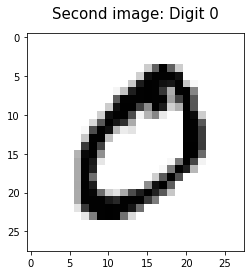

In [10]:
second_image = X.iloc[1].values.reshape([28,28])
plt.imshow(second_image, cmap='gray_r')
plt.title('Second image: Digit 0', fontsize=15, pad=15)
#plt.savefig("Second image.png")

Text(0, 0.5, 'Explained variance')

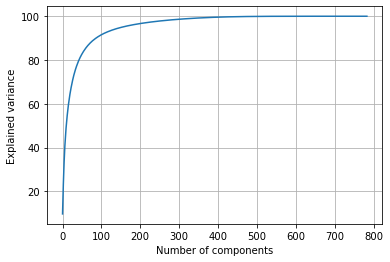

In [11]:
import numpy as np
from sklearn.decomposition import PCA

pca_784 = PCA(n_components=784)
pca_784.fit(mnist)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0.5, 1.0, 'Compressed image with 180 components')

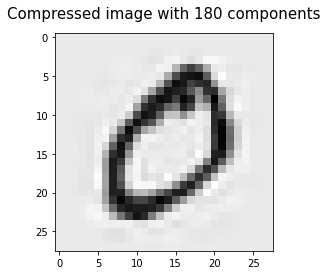

In [19]:
pca_180 = PCA(n_components=180)
mnist_pca_180_reduced = pca_180.fit_transform(X)
mnist_pca_180_recovered = pca_180.inverse_transform(mnist_pca_180_reduced)

image_pca_180 = mnist_pca_180_recovered[1,:].reshape([28,28])
plt.imshow(image_pca_180, cmap='gray_r')
plt.title('Compressed image with 180 components', fontsize=15, pad=15)

In [20]:
np.cumsum(pca_180.explained_variance_ratio_ * 100)[-1]

95.98592526187548